# Proyecto final para el curso "De cero a ciencia de datos"
### Predicción de incumplimiento de pagos utilizando un conjunto de datos de una empresa de servicios financieros
### Se utilizarán dos modelos para predecir si los clientes incurrirán en incumplimiento de pagos para el siguiente mes

### 1. Importaciones y análisis exploratorio de datos

In [68]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

In [72]:
# Importación del data frame
data = pd.read_csv("data.csv")

In [74]:
# Dimensiones del conjunto de datos
data.shape

(30000, 25)

In [4]:
# Se utiliza el método head y tail para revisar las primeras y últimas filas respectivamente.
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [23]:
# Se utiliza el método describe para revisar las medidas estadísticas. 
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# Se renombran las columnas para mayor claridad
data.rename(columns={
    'ID': 'id',
    'LIMIT_BAL': 'credit_limit',
    'SEX': 'gender',
    'EDUCATION': 'education_level',
    'MARRIAGE': 'marital_status',
    'AGE': 'age',
    'PAY_0': 'payment_status_month_1',
    'PAY_2': 'payment_status_month_2',
    'PAY_3': 'payment_status_month_3',
    'PAY_4': 'payment_status_month_4',
    'PAY_5': 'payment_status_month_5',
    'PAY_6': 'payment_status_month_6',
    'BILL_AMT1': 'bill_amount_month_1',
    'BILL_AMT2': 'bill_amount_month_2',
    'BILL_AMT3': 'bill_amount_month_3',
    'BILL_AMT4': 'bill_amount_month_4',
    'BILL_AMT5': 'bill_amount_month_5',
    'BILL_AMT6': 'bill_amount_month_6',
    'PAY_AMT1': 'payment_amount_month_1',
    'PAY_AMT2': 'payment_amount_month_2',
    'PAY_AMT3': 'payment_amount_month_3',
    'PAY_AMT4': 'payment_amount_month_4',
    'PAY_AMT5': 'payment_amount_month_5',
    'PAY_AMT6': 'payment_amount_month_6',
    'default.payment.next.month': 'default_next_month'
}, inplace=True)

In [25]:
# Se vuelven a revisar las primeras filas para verificar el cambio
data.head()

,id,credit_limit,gender,education_level,marital_status,age,payment_status_month_1,payment_status_month_2,payment_status_month_3,payment_status_month_4,...,bill_amount_month_4,bill_amount_month_5,bill_amount_month_6,payment_amount_month_1,payment_amount_month_2,payment_amount_month_3,payment_amount_month_4,payment_amount_month_5,payment_amount_month_6,default_next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [26]:
# Contar los datos
data.count()

id                        30000
credit_limit              30000
gender                    30000
education_level           30000
marital_status            30000
age                       30000
payment_status_month_1    30000
payment_status_month_2    30000
payment_status_month_3    30000
payment_status_month_4    30000
payment_status_month_5    30000
payment_status_month_6    30000
bill_amount_month_1       30000
bill_amount_month_2       30000
bill_amount_month_3       30000
bill_amount_month_4       30000
bill_amount_month_5       30000
bill_amount_month_6       30000
payment_amount_month_1    30000
payment_amount_month_2    30000
payment_amount_month_3    30000
payment_amount_month_4    30000
payment_amount_month_5    30000
payment_amount_month_6    30000
default_next_month        30000
dtype: int64

In [27]:
# Verificar que no haya valores nulos
data.isnull().sum()

id                        0
credit_limit              0
gender                    0
education_level           0
marital_status            0
age                       0
payment_status_month_1    0
payment_status_month_2    0
payment_status_month_3    0
payment_status_month_4    0
payment_status_month_5    0
payment_status_month_6    0
bill_amount_month_1       0
bill_amount_month_2       0
bill_amount_month_3       0
bill_amount_month_4       0
bill_amount_month_5       0
bill_amount_month_6       0
payment_amount_month_1    0
payment_amount_month_2    0
payment_amount_month_3    0
payment_amount_month_4    0
payment_amount_month_5    0
payment_amount_month_6    0
default_next_month        0
dtype: int64

In [69]:
# Se elimina la columna Id porque puede afectar el análisis
data.drop(columns=['id'], inplace=True)

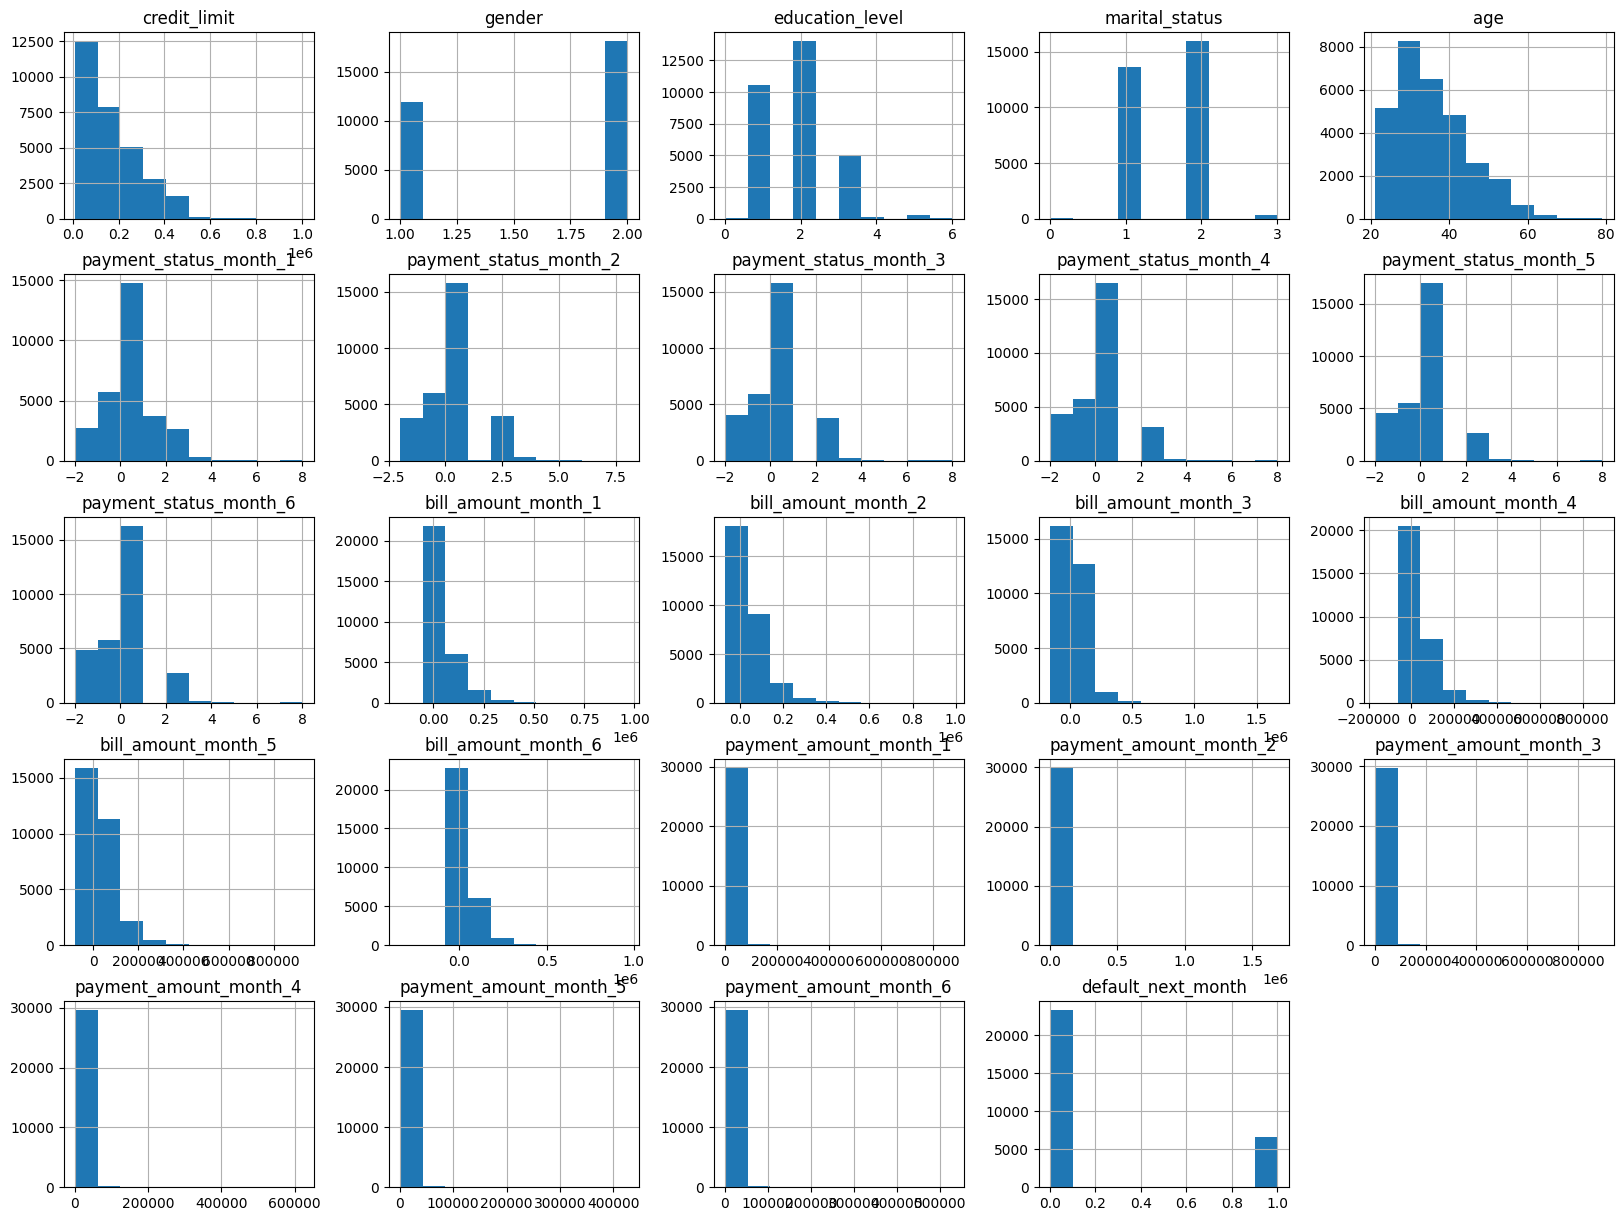

In [29]:
# Histograma de todas las variables numéricas
data.hist(figsize=(20, 15))
plt.show()

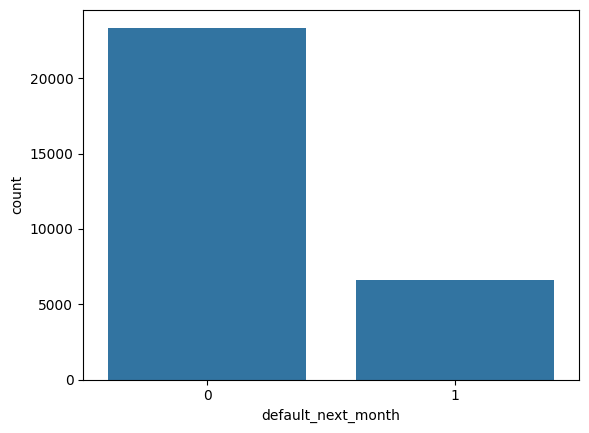

In [6]:
# Al ser la columna target, podemos graficar específicamente la columna default_next_month
sns.countplot(x='default_next_month', data=data)
plt.show()

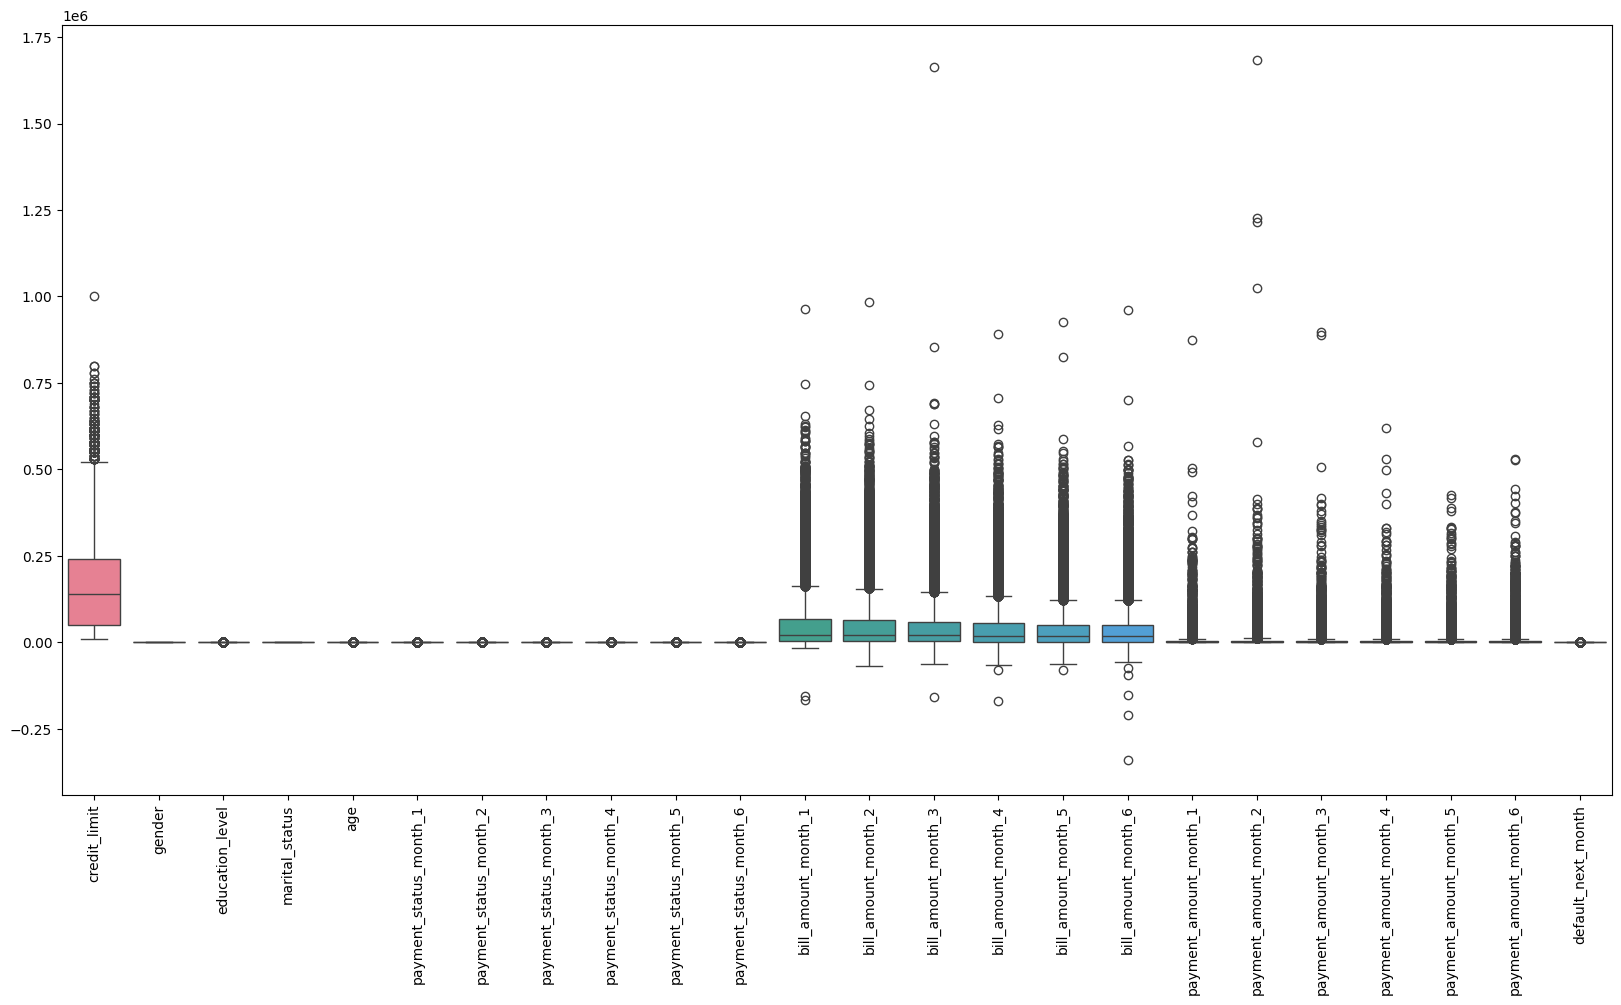

In [30]:
# Boxplot para detectar outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

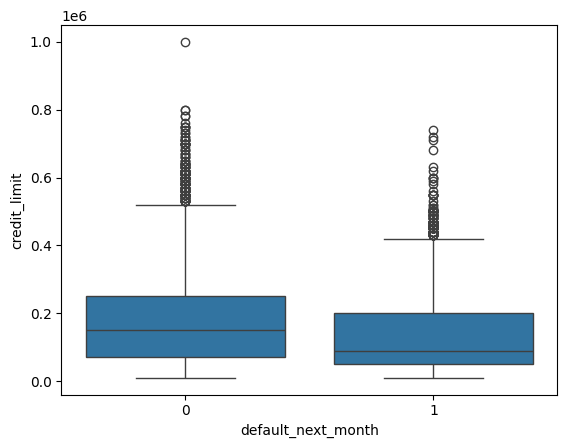

In [33]:
# Relación entre el límite de crédito y la variable objetivo
sns.boxplot(x='default_next_month', y='credit_limit', data=data)
plt.show()

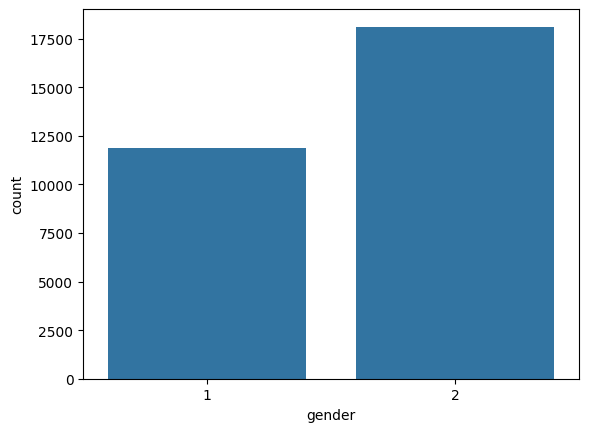

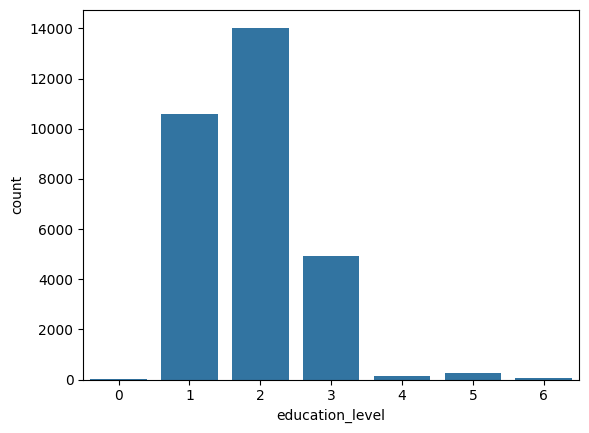

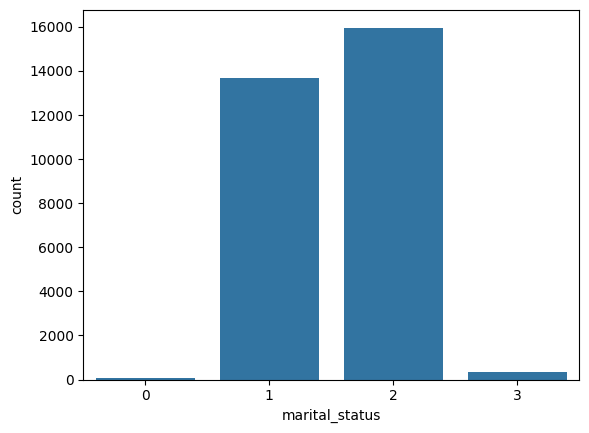

In [70]:
# Conteo de las variables categóricas
categorical_features = ['gender', 'education_level', 'marital_status']
for feature in categorical_features:
    sns.countplot(x=feature, data=data)
    plt.show()

In [30]:
#Modificar la edad a categorías, para así poder mejorar los modelos
# Definir los límites de las categorías y asignar números a cada intervalo
bins = [0, 18, 25, 35, 45, 55, 100]
labels = [1, 2, 3, 4, 5, 6]

# Crear una nueva columna 'age_category' con las categorías numéricas
data['age_category'] = pd.cut(data['age'], bins=bins, labels=labels).astype(int)

# Eliminar la columna original de edad si ya no es necesaria
data = data.drop(['age'], axis=1)

In [31]:
data.head()

,id,credit_limit,gender,education_level,marital_status,payment_status_month_1,payment_status_month_2,payment_status_month_3,payment_status_month_4,payment_status_month_5,...,bill_amount_month_5,bill_amount_month_6,payment_amount_month_1,payment_amount_month_2,payment_amount_month_3,payment_amount_month_4,payment_amount_month_5,payment_amount_month_6,default_next_month,age_category
0,1,20000.0,2,2,1,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2
1,2,120000.0,2,2,2,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3
2,3,90000.0,2,2,2,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,3
3,4,50000.0,2,2,1,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,4
4,5,50000.0,1,2,1,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,6


### 2. Regresión logística

In [32]:
# En primer lugar se crea la matriz X con todas las columnas menos la columna objetivo y se crea el vector con ella
X = np.array(data.drop(['default_next_month'],axis=1))
y = np.array(data['default_next_month'])

In [33]:
# Dimensiones del array
X.shape

(30000, 24)

In [34]:
# Se divide el conjunto de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Se crea el objeto del modelo
model = linear_model.LogisticRegression(class_weight='balanced')

In [37]:
# Se entrena el modelo con las variables de entrenamiento (el 80% de los datos del conjunto)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [38]:
# Se crea una variable de predicciones con la matriz X de pruebas
y_predictions = model.predict(X_test)

In [39]:
# Se muestra la puntuación de presición
accuracy_score(y_test, y_predictions)

0.6925

In [40]:
# Se muestra la matriz de confusión
confusion_matrix(y_test, y_predictions)

array([[3307, 1380],
       [ 465,  848]], dtype=int64)

In [41]:
#Se muestra el reporte de clasificación
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78      4687
           1       0.38      0.65      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.72      6000



### Árbol de decisiones

In [42]:
# Se utilizan las mismas variables que ya habíamos creado para la regresión logística, es decir, X_train, X_test, etc.
X

array([[1.0000e+00, 2.0000e+04, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [2.0000e+00, 1.2000e+05, 2.0000e+00, ..., 0.0000e+00, 2.0000e+03,
        3.0000e+00],
       [3.0000e+00, 9.0000e+04, 2.0000e+00, ..., 1.0000e+03, 5.0000e+03,
        3.0000e+00],
       ...,
       [2.9998e+04, 3.0000e+04, 1.0000e+00, ..., 2.0000e+03, 3.1000e+03,
        4.0000e+00],
       [2.9999e+04, 8.0000e+04, 1.0000e+00, ..., 5.2964e+04, 1.8040e+03,
        4.0000e+00],
       [3.0000e+04, 5.0000e+04, 1.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        5.0000e+00]])

In [51]:
# Se crea el objeto modelo
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    min_samples_split=20,
    min_samples_leaf=5,
    max_depth=4,
    class_weight={1: 3.5}
)

In [52]:
# Se entrena el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={1: 3.5}, criterion='entropy', max_depth=4,
                       min_samples_leaf=5, min_samples_split=20)

In [53]:
# Se hacen las predicciones para y
y_predictions = model.predict(X_test)

In [54]:
# Se muestra la puntuación de presición
accuracy_score(y_test, y_predictions)

0.7803333333333333

In [55]:
# Se muestra la matriz de confusión
confusion_matrix(y_test, y_predictions)

array([[3967,  720],
       [ 598,  715]], dtype=int64)

In [56]:
#Se muestra el reporte de clasificación
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4687
           1       0.50      0.54      0.52      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



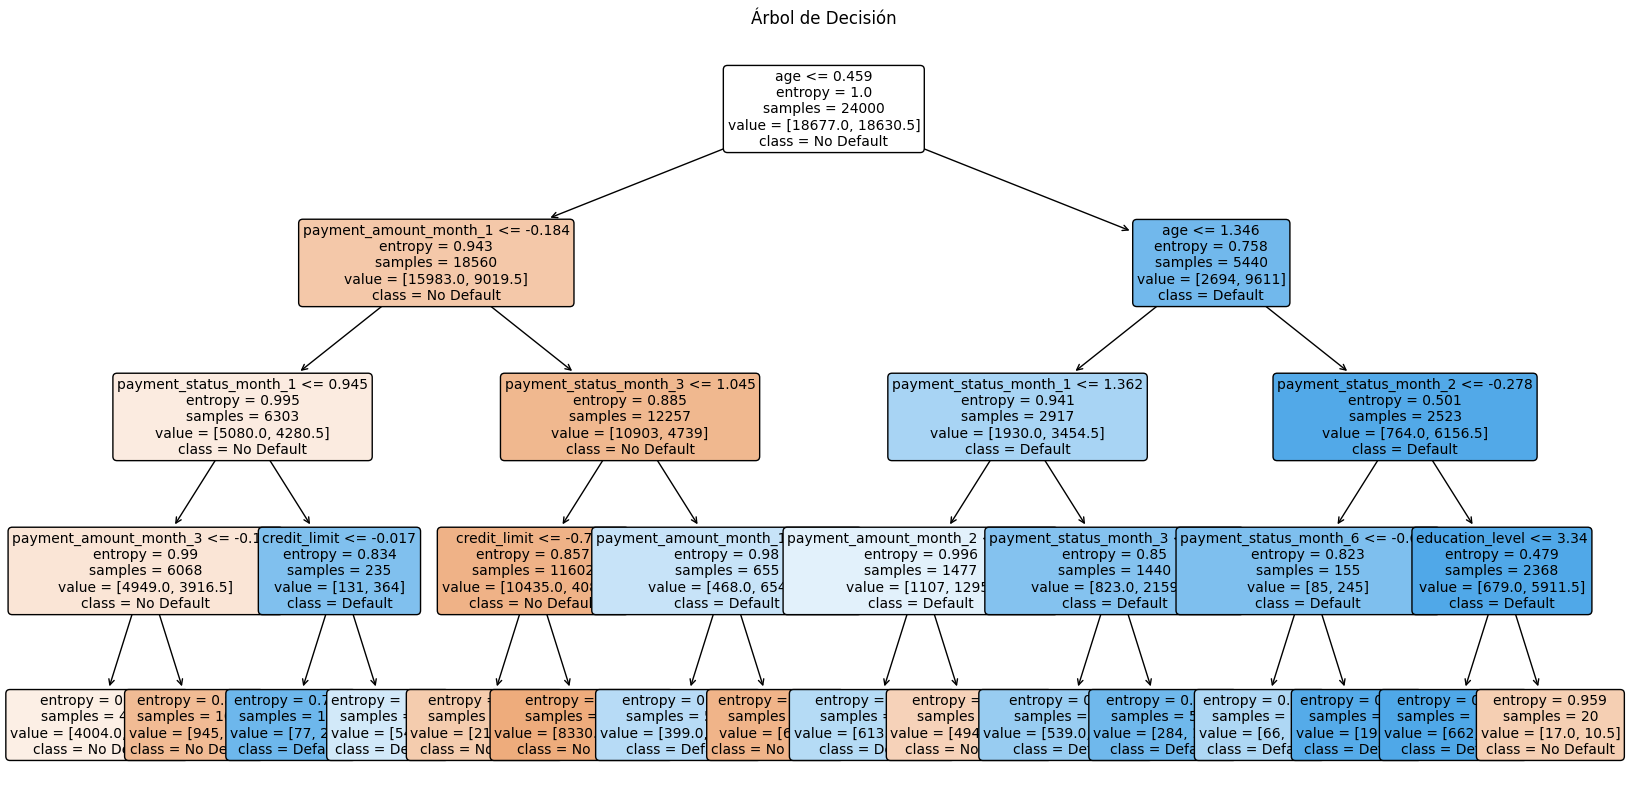

In [76]:
#Se puede crear una visualización gráfica del árbol
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=['No Default', 'Default'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Árbol de Decisión')
plt.show()